In [129]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as p
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pandas_ta import ema

Import data.

In [130]:
input_file = "AAPL.csv"
data_price = p.read_csv(input_file)
data_volume = p.read_csv(input_file)

print(data_price.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [131]:
data_price.set_index(p.DatetimeIndex(data_price['Date']), inplace=True)
data_volume.set_index(p.DatetimeIndex(data_volume['Date']), inplace=True)
data_price = data_price[["Open"]]
data_volume = data_volume[["Volume"]]

In [132]:
data_price.ta.ema(close="open", length = 100, append = True)
data_volume.ta.ema(close="volume", length = 100, append = True)
print(data_price)
print(data_volume)


                  Open     EMA_100
Date                              
1980-12-12    0.128348         NaN
1980-12-15    0.122210         NaN
1980-12-16    0.113281         NaN
1980-12-17    0.115513         NaN
1980-12-18    0.118862         NaN
...                ...         ...
2022-05-31  149.070007  159.071790
2022-06-01  149.899994  158.890170
2022-06-02  147.830002  158.671157
2022-06-03  146.899994  158.438065
2022-06-06  147.029999  158.212162

[10459 rows x 2 columns]
               Volume       EMA_100
Date                               
1980-12-12  469033600           NaN
1980-12-15  175884800           NaN
1980-12-16  105728000           NaN
1980-12-17   86441600           NaN
1980-12-18   73449600           NaN
...               ...           ...
2022-05-31  103718400  9.877867e+07
2022-06-01   74286600  9.829368e+07
2022-06-02   72348100  9.777991e+07
2022-06-03   88471400  9.759558e+07
2022-06-06   71490300  9.707864e+07

[10459 rows x 2 columns]


In [133]:
#remove n rows
n = 100
data_price = data_price.iloc[n:]
data_volume = data_volume.iloc[n:]
print(data_price)
print(data_volume)

data_money = data_volume.mul(data_price, axis=0)
print(data_money)

                  Open     EMA_100
Date                              
1981-05-07    0.123884    0.124994
1981-05-08    0.125000    0.124994
1981-05-11    0.122768    0.124950
1981-05-12    0.122210    0.124896
1981-05-13    0.122210    0.124843
...                ...         ...
2022-05-31  149.070007  159.071790
2022-06-01  149.899994  158.890170
2022-06-02  147.830002  158.671157
2022-06-03  146.899994  158.438065
2022-06-06  147.029999  158.212162

[10359 rows x 2 columns]
                 EMA_100  Open  Volume
Date                                  
1981-05-07  4.410089e+06   NaN     NaN
1981-05-08  4.342336e+06   NaN     NaN
1981-05-11  4.284389e+06   NaN     NaN
1981-05-12  4.208252e+06   NaN     NaN
1981-05-13  4.135291e+06   NaN     NaN
...                  ...   ...     ...
2022-05-31  1.571290e+10   NaN     NaN
2022-06-01  1.561790e+10   NaN     NaN
2022-06-02  1.551485e+10   NaN     NaN
2022-06-03  1.546285e+10   NaN     NaN
2022-06-06  1.535902e+10   NaN     NaN

[10359 rows

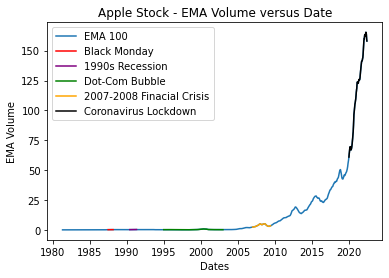

In [134]:
#Actual Plot
plt.plot(data[["EMA_100"]])
plt.xlabel("Dates")
plt.ylabel("EMA Volume")
plt.title("Apple Stock - EMA Volume versus Date")

#Create line plots for recessions
data_used = data[["EMA_100"]]
black_monday_1980 = data_used["1987-07-01":"1988-03-01"]
plt.plot(black_monday_1980, c = "red")

recession_1990s = data_used["1990-06-01":"1991-05-01"]
plt.plot(recession_1990s, c = "purple")

dot_cot_bubble = data_used["1995-01-01":"2002-12-31"]
plt.plot(dot_cot_bubble, c="green")

financial_crisis_2008 = data_used["2007-01-01":"2009-6-1"]
plt.plot(financial_crisis_2008, c = "orange")

corona = data_used["2020-01-01":]
plt.plot(corona, c = "black")

recessions = ["EMA 100", "Black Monday", "1990s Recession", 
"Dot-Com Bubble", "2007-2008 Finacial Crisis", "Coronavirus Lockdown"]
plt.legend(recessions)

plt.show()

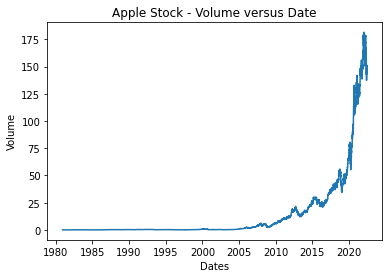

In [135]:

plt.plot(data[["Adj Close"]])
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.title("Apple Stock - Volume versus Date")
plt.show()